In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
table_names = Base.classes.keys()

tables = {}

for table_name in table_names:
    table_class = getattr(Base.classes, table_name)
    tables[table_name] = table_class

In [9]:
# Save references to each tab
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [13]:
from datetime import datetime, timedelta

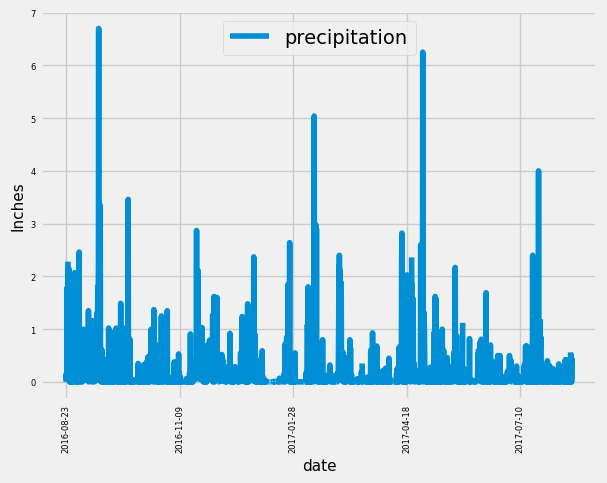

In [90]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the databa set. 
        #end_timestamp = datetime(2017, 8, 23)
        #start_timestamp = datetime(2016, 8, 23)
        #over_year = session.query(measurement.prcp).filter(measurement.date.between(start_timestamp, end_timestamp,)).all()
        #over_year
session.query(measurement.date).order_by(measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
        #last_date_str = session.query(func.max(measurement.date)).scalar()
        #last_date = datetime.strptime(last_date_str, '%Y-%m-%d')
        #past_year = last_date - timedelta(days=365)
        #past_year
last_year = dt.datetime(2017, 8, 23)-dt.timedelta(365)
over_year = dt.date(last_year.year, last_year.month, last_year.day)
#over_year

# Perform a query to retrieve the data and precipitation scores
                #precip_year = engine.execute(('select date, prcp from measurement where date >= "2016-08-23"')).fetchall()
                #precip_agg_df = precip_df.groupby(by=["date"]).sum("precipitation")
                #precip_agg_df
precip_year = session.query(measurement.date, measurement.prcp).filter(measurement.date >= over_year).order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip_year, columns=["date", "precipitation"])
precip_df

# Sort the dataframe by date
precip_df.set_index(precip_df["date"], inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot("date", "precipitation")

plt.xlabel("date", size=11)
plt.ylabel("Inches", size=11)

plt.legend(["precipitation"], loc="upper center")

plt.xticks(rotation=90, size=6)
plt.yticks(size=6)

plt.show()

In [32]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [85]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.station).count()

9

In [23]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
results = [measurement.station,
                        func.min(measurement.tobs),
                        func.max(measurement.tobs),
                        func.avg(measurement.tobs)
]  

active_results = session.query(*results).\
    filter(measurement.station == 'USC00519281').all()
active_results

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

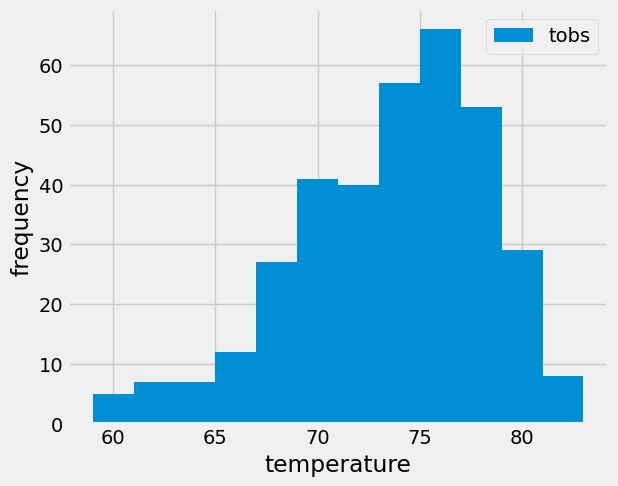

In [71]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date >= '2016-08-23').all()

active_station_temp = pd.DataFrame(results, columns=['tobs'])
active_station_temp.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("temperature")
plt.ylabel("frequency")
plt.show()

# Close Session

In [16]:
# Close Session
session.close()